### Importing Important Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [107]:
df = pd.read_csv("country-data.csv",encoding='latin1')

### Data Cleaning

In [108]:
Missing = 'Saint Maarten'
df['Country Name'] = df['Country Name'].fillna(Missing)
df = df.drop(['Country Code','Table Name','Long Name'],1)

In [109]:
country_data = df.set_index("Country Name").transpose()
null_values = country_data.isnull().sum()
more_than_25 = list(null_values[null_values >=25].index)

In [110]:
country_data = country_data.drop(more_than_25, axis=1)

In [111]:
country_data.shape

(76, 144)

In [112]:
unneded_indicators=['IT_NET_USER_P2', 'SH_DYN_AIDS_ZS','SH_DYN_MORT','SH_MED_PHYS_ZS','SH_XPD_PCAP','SN_ITK_DEFC_ZS','SP_POP_DPND','SG_VAW_BURN_ZS','SH_TBS_PREV']
country_data = country_data.drop(unneded_indicators, axis=0)
country_data.shape

(67, 144)

### Data Preprocessing

Similar columns are 'combined' using Principal Component Analysis to reduce the dimensionality of the data. Before PCA, the dataset is transformed using Standard Scaler because PCA is sensitive to unscaled data.

+ Education Average Years
+ Education Percentage
+ Education Literacy

For education, the primary column used is Education Average Years because the other variables have a lot of missing data which could lead to data bias.

In [113]:
data = country_data.T

In [114]:
education_avg_years = data.loc[:,'BAR_SCHL_1519':'BAR_SCHL_75UP_FE']
education_pct = data.loc[:,'UIS_EA_1_AG25T99':'UIS_EA_8_AG25T99']
literacy = data.loc[:,'SE_ADT_1524_LT_FE_ZS':'SE_ADT_LITR_ZS']

In [115]:
#The education_pct and literacy columns have a lot of missing country data
display(education_pct.isnull().sum())
display(literacy.isnull().sum())

UIS_EA_1_AG25T99       40
UIS_EA_1T6_AG25T99     51
UIS_EA_2_AG25T99       35
UIS_EA_2T6_AG25T99     39
UIS_EA_3_AG25T99       35
UIS_EA_3T6_AG25T99     35
UIS_EA_4_AG25T99       67
UIS_EA_4T6_AG25T99     65
UIS_EA_5_AG25T99       97
UIS_EA_5T8_AG25T99     40
UIS_EA_6_AG25T99       42
UIS_EA_6T8_AG25T99    100
UIS_EA_7_AG25T99      104
UIS_EA_7T8_AG25T99    106
UIS_EA_8_AG25T99      112
dtype: int64

SE_ADT_1524_LT_FE_ZS    24
SE_ADT_1524_LT_FM_ZS    24
SE_ADT_1524_LT_MA_ZS    24
SE_ADT_1524_LT_ZS       23
SE_ADT_LITR_FE_ZS       24
SE_ADT_LITR_MA_ZS       24
SE_ADT_LITR_ZS          24
dtype: int64

In [116]:
literacy = literacy.fillna(literacy.median())

In [117]:
#For refrence the column names for each category were save in lists.

list_a = list(data.loc[:,'BAR_SCHL_1519':'BAR_SCHL_75UP_FE'].columns)
list_b = list(data.loc[:,'UIS_EA_1_AG25T99':'UIS_EA_8_AG25T99'].columns)
list_c = list(data.loc[:,'SE_ADT_1524_LT_FE_ZS':'SE_ADT_LITR_ZS'].columns)

In [119]:
standard = StandardScaler()
avg_years_scaled = standard.fit_transform(education_avg_years)
lit_scaled = standard.fit_transform(literacy)

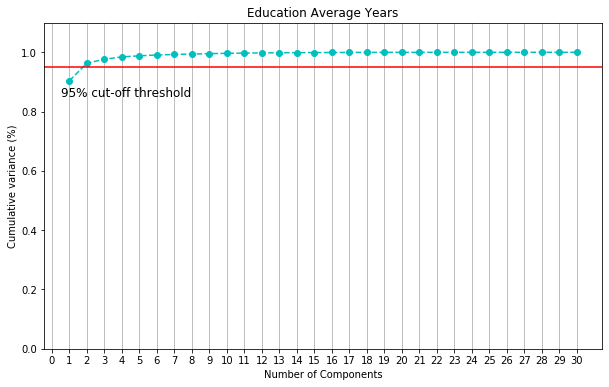

In [120]:
'''
This is used to find the optimum number of components for PCA of Average years education category

'''
pca = PCA().fit(avg_years_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='c')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Education Average Years')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'black', fontsize=12)

ax.grid(axis='x')
plt.show()

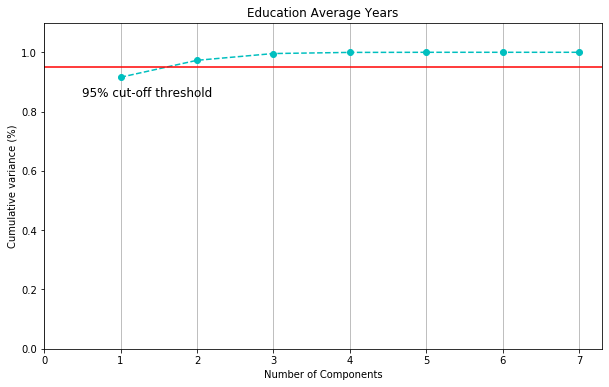

In [122]:
'''
This is used to find the optimum number of components for PCA of Literacy education category

'''
pca = PCA().fit(lit_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='c')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 8, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Education Average Years')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'black', fontsize=12)

ax.grid(axis='x')
plt.show()

In [123]:
countries = data.index
pca = PCA(n_components=2)
avg_years_pca = pca.fit_transform(avg_years_scaled)
avg_years_pca = pd.DataFrame(avg_years_pca, columns=['AVG YEARS 1','AVG YEARS 2'], index = countries)

In [124]:
pca = PCA(n_components=2)
lit_pca = pca.fit_transform(lit_scaled)
lit_pca = pd.DataFrame(lit_pca, columns=['LIT 1','LIT 2'], index = countries)

In [125]:
data = data.drop(list_a+list_b+list_c,1)

In [126]:
display(data.isnull().sum())

data = data.drop(['EN_POP_SLUM_UR_ZS','IC_FRM_ISOC_ZS','SL_TLF_SECO_ZS'],1)
data = data.fillna(data.median())

EG_ELC_ACCS_ZS           0
EN_POP_SLUM_UR_ZS       63
FB_ATM_TOTL_P5           4
IC_ELC_TIME              2
IC_FRM_ISOC_ZS          36
IC_TAX_TOTL_CP_ZS        2
IQ_WEF_PORT_XQ          14
SE_XPD_TOTL_GD_ZS        0
SL_EMP_TOTL_SP_ZS        1
SL_TLF_SECO_ZS          40
SL_TLF_TOTL_IN           0
TM_TAX_MANF_SM_FN_ZS     1
UIS_PTRHC_2             23
UIS_PTRHC_3             25
UIS_PTRHC_56             2
dtype: int64

In [128]:
data = standard.fit_transform(data)
data = pd.DataFrame(data, columns = ['variable 1','variable 2','variable 3','variable 4','variable 5','variable 6',
                            'variable 7','variable 8','variable 9', 'variable 10','variable 11', 'variable 12'], index=countries)

In [129]:
data['variable 13'] = avg_years_pca['AVG YEARS 1']
data['variable 14'] = avg_years_pca['AVG YEARS 2']

In [130]:
data['variable 13'] = lit_pca['LIT 1']
data['variable 14'] = lit_pca['LIT 2']

In [136]:
X = np.asarray(data)

### K Means

In [141]:
distortions = []
inertias = []
K = range(1, 10)

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

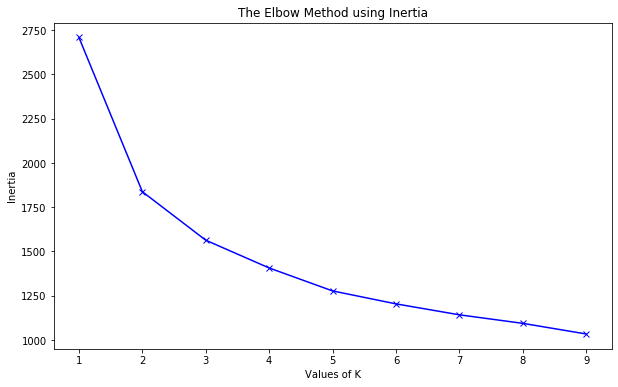

In [142]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

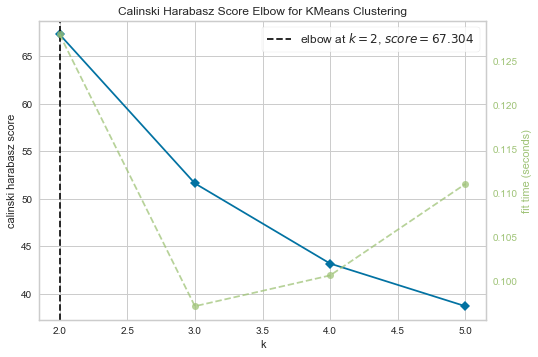

In [169]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='calinski_harabasz', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()     

In [191]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
kmeans.labels_

array([1, 0, 2, 0, 0, 2, 2, 3, 2, 1, 3, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 3, 3, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 3, 3, 2, 0, 0, 2, 2, 2, 3, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 3, 0, 3, 2, 2, 3, 1, 0, 0, 3, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 3,
       0, 3, 1, 2, 3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 0, 0, 3, 2, 2, 0, 2,
       0, 2, 3, 2, 3, 3, 2, 1, 0, 0, 0, 2, 2, 0, 0, 3, 2, 0, 0, 2, 0, 0,
       3, 3, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3])

In [192]:
result = pd.Series(kmeans.labels_, index=countries)

In [197]:
result[result==2]

Country Name
United Arab Emirates    2
Australia               2
Austria                 2
Belgium                 2
Bulgaria                2
Bahrain                 2
Barbados                2
Brunei Darussalam       2
Canada                  2
Switzerland             2
Chile                   2
Cuba                    2
Cyprus                  2
Germany                 2
Denmark                 2
Spain                   2
Estonia                 2
Finland                 2
France                  2
United Kingdom          2
Greece                  2
Hong Kong SAR, China    2
Honduras                2
Croatia                 2
Ireland                 2
Iceland                 2
Israel                  2
Japan                   2
Korea, Rep.             2
Kuwait                  2
Lithuania               2
Luxembourg              2
Latvia                  2
Macao SAR, China        2
Malta                   2
Mauritius               2
Malaysia                2
Netherlands             2